# Caso Práctico con Regresión Logística

## Detección de transacciones bancarias fraudulentas con tarjetas de crédito

### Descripción del conjunto de datos:
El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares europeos. En este conjunto, se registran transacciones que tuvieron lugar en dos días, con 492 casos de fraude de un total de 284,807 transacciones, lo que genera un desbalance significativo, ya que la clase positiva (fraudes) representa solo el 0.172% de todas las transacciones. Las variables de entrada son exclusivamente numéricas, resultado de una transformación PCA. Por razones de confidencialidad, no se pueden proporcionar las características originales ni más información de fondo sobre los datos. Las características V1 a V28 son los componentes principales; las únicas características que no han sido transformadas con PCA son 'Time' y 'Amount'. La característica 'Time' representa los segundos transcurridos entre cada transacción y la primera en el conjunto de datos, mientras que 'Amount' es el monto de la transacción. La variable 'Class' es la variable a predecir, tomando el valor 1 en caso de fraude y 0 en caso contrario.

### Fuente del fichero de datos:
Los datos fueron extraídos de https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/download?datasetVersionNumber=3

## Librerías utilizadas

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter("ignore")
%matplotlib inline

## 1. Lectura del conjunto de datos

Se utiliza la librería pandas para importar los datos en formato "csv"

In [3]:
df = pd.read_csv("dataset/creditcard2023.csv")

## 2. Comprensión del conjunto de datos

### 2.1. Vista preliminar

In [4]:
df.head(8)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.985,-0.356,0.558,-0.430,0.277,0.429,0.406,-0.133,0.347,...,-0.195,-0.606,0.079,-0.577,0.190,0.297,-0.248,-0.065,6531.37,0
1,3,-0.152,-0.509,1.747,-1.090,0.249,1.143,0.518,-0.065,-0.206,...,-0.147,-0.038,-0.214,-1.893,1.004,-0.516,-0.165,0.048,5384.44,0
2,6,1.016,-0.397,0.498,-0.144,0.331,0.629,0.431,-0.134,0.796,...,-0.171,-0.287,-0.178,-1.298,1.183,-0.604,-0.198,-0.088,18954.45,0
3,8,-0.131,-0.350,0.426,-0.760,1.703,2.325,0.569,0.049,0.273,...,-0.133,-0.285,-0.228,2.249,0.535,-0.930,-0.224,0.244,22052.90,0
4,12,1.034,-0.902,0.677,-1.319,-0.216,0.025,0.223,-0.203,-0.502,...,-0.197,-0.473,0.062,0.833,0.180,-0.854,-0.208,0.002,21696.89,0
5,15,-0.087,-0.330,2.000,-1.471,-0.126,0.431,0.245,-0.152,0.250,...,0.092,1.303,-0.279,-0.086,-0.147,-0.188,-0.437,0.212,23472.79,0
6,17,0.021,-0.153,1.029,-1.010,0.668,0.402,0.707,-0.132,0.132,...,-0.182,-0.635,-0.181,-1.465,-0.629,-0.099,-0.145,0.216,15493.04,0
7,19,1.245,-0.825,0.719,-1.451,-0.235,0.045,0.120,-0.164,-0.455,...,-0.175,-0.202,0.017,0.628,0.467,-0.512,-0.212,-0.082,2943.42,0


### 2.2. Primeras nociones

##### Características y registros

In [5]:
print("Número de variables predictoras:", len(df.columns))
print("Cantidad de registros:", len(df))

Número de variables predictoras: 31
Cantidad de registros: 123304


##### Casos positivos de fraude

In [6]:
print("Cantidad de registros de fraude positivo:", df['Class'].value_counts().get(1))
print("Tasa de fraude:", df["Class"].mean())

Cantidad de registros de fraude positivo: 9057
Tasa de fraude: 0.07345260494387855


##### Tipo de datos de las variables predictoras

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123304 entries, 0 to 123303
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      123304 non-null  int64  
 1   V1      123304 non-null  float64
 2   V2      123304 non-null  float64
 3   V3      123304 non-null  float64
 4   V4      123304 non-null  float64
 5   V5      123304 non-null  float64
 6   V6      123304 non-null  float64
 7   V7      123304 non-null  float64
 8   V8      123304 non-null  float64
 9   V9      123304 non-null  float64
 10  V10     123304 non-null  float64
 11  V11     123304 non-null  float64
 12  V12     123304 non-null  float64
 13  V13     123304 non-null  float64
 14  V14     123304 non-null  float64
 15  V15     123304 non-null  float64
 16  V16     123304 non-null  float64
 17  V17     123304 non-null  float64
 18  V18     123304 non-null  float64
 19  V19     123304 non-null  float64
 20  V20     123304 non-null  float64
 21  V21     12

##### Análisis de valores perdidos

Ninguna de las variables contiene valores perdidos, nulos o infinitos.

In [8]:
df.isna().any()

id        False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

##### Análisis descriptivo del DataFrame

In [9]:
# No aporta demasiada información ya que las variables se encuentran tranformadas
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,123304.000000,123304.000000,123304.000000,123304.000000,123304.000000,123304.000000,123304.000000,123304.000000,123304.000000,123304.000000,...,123304.000000,123304.000000,123304.000000,123304.000000,123304.000000,123304.000000,123304.000000,123304.000000,123304.000000,123304.000000
mean,163559.392364,0.429088,-0.420031,0.582450,-0.628816,0.291769,0.372807,0.420085,-0.123824,0.499629,...,-0.093957,-0.011291,-0.007687,0.110104,-0.051599,-0.054920,-0.181616,-0.089680,12029.085584,0.073453
std,110582.440644,0.869564,0.777474,0.789638,0.773328,0.720002,0.784062,0.650229,0.440822,0.807921,...,0.465837,0.726441,0.696163,1.113041,0.865448,1.071021,0.571369,0.783815,6925.966837,0.260879
min,1.000000,-3.219000,-42.460000,-2.631000,-4.834000,-5.183000,-15.512000,-4.325000,-10.756000,-3.752000,...,-19.383000,-7.735000,-30.295000,-4.051000,-13.613000,-8.227000,-6.061000,-24.176000,50.380000,0.000000
25%,77233.000000,-0.179000,-0.639000,0.071000,-1.047000,-0.016000,-0.025000,0.231000,-0.198000,0.076000,...,-0.194000,-0.520000,-0.192000,-0.613000,-0.584000,-0.756000,-0.316000,-0.229000,6030.927500,0.000000
50%,154104.500000,0.144000,-0.398000,0.508000,-0.580000,0.219000,0.291000,0.432000,-0.144000,0.430000,...,-0.108000,-0.035000,-0.039000,0.105000,-0.049000,-0.085000,-0.230000,-0.068000,11982.795000,0.000000
75%,230660.250000,1.054000,-0.146000,1.053000,-0.218000,0.514000,0.676000,0.638000,-0.066000,0.850000,...,-0.016000,0.462000,0.130250,0.902000,0.506000,0.564000,-0.103000,0.116000,18038.777500,0.000000
max,568577.000000,2.226000,4.342000,4.615000,3.202000,33.318000,9.704000,41.880000,5.958000,10.375000,...,8.087000,12.633000,31.708000,10.856000,11.558000,5.556000,26.944000,37.268000,24039.930000,1.000000


##### Representación gráfica de cada característica con la variable dependiente

En la gráfica siguiente se puede apreciar las funciones de densidad para cada característica junto con la variable objetivo. Aquellas que posean una mayor distancia en el eje x, serán las más representativas.


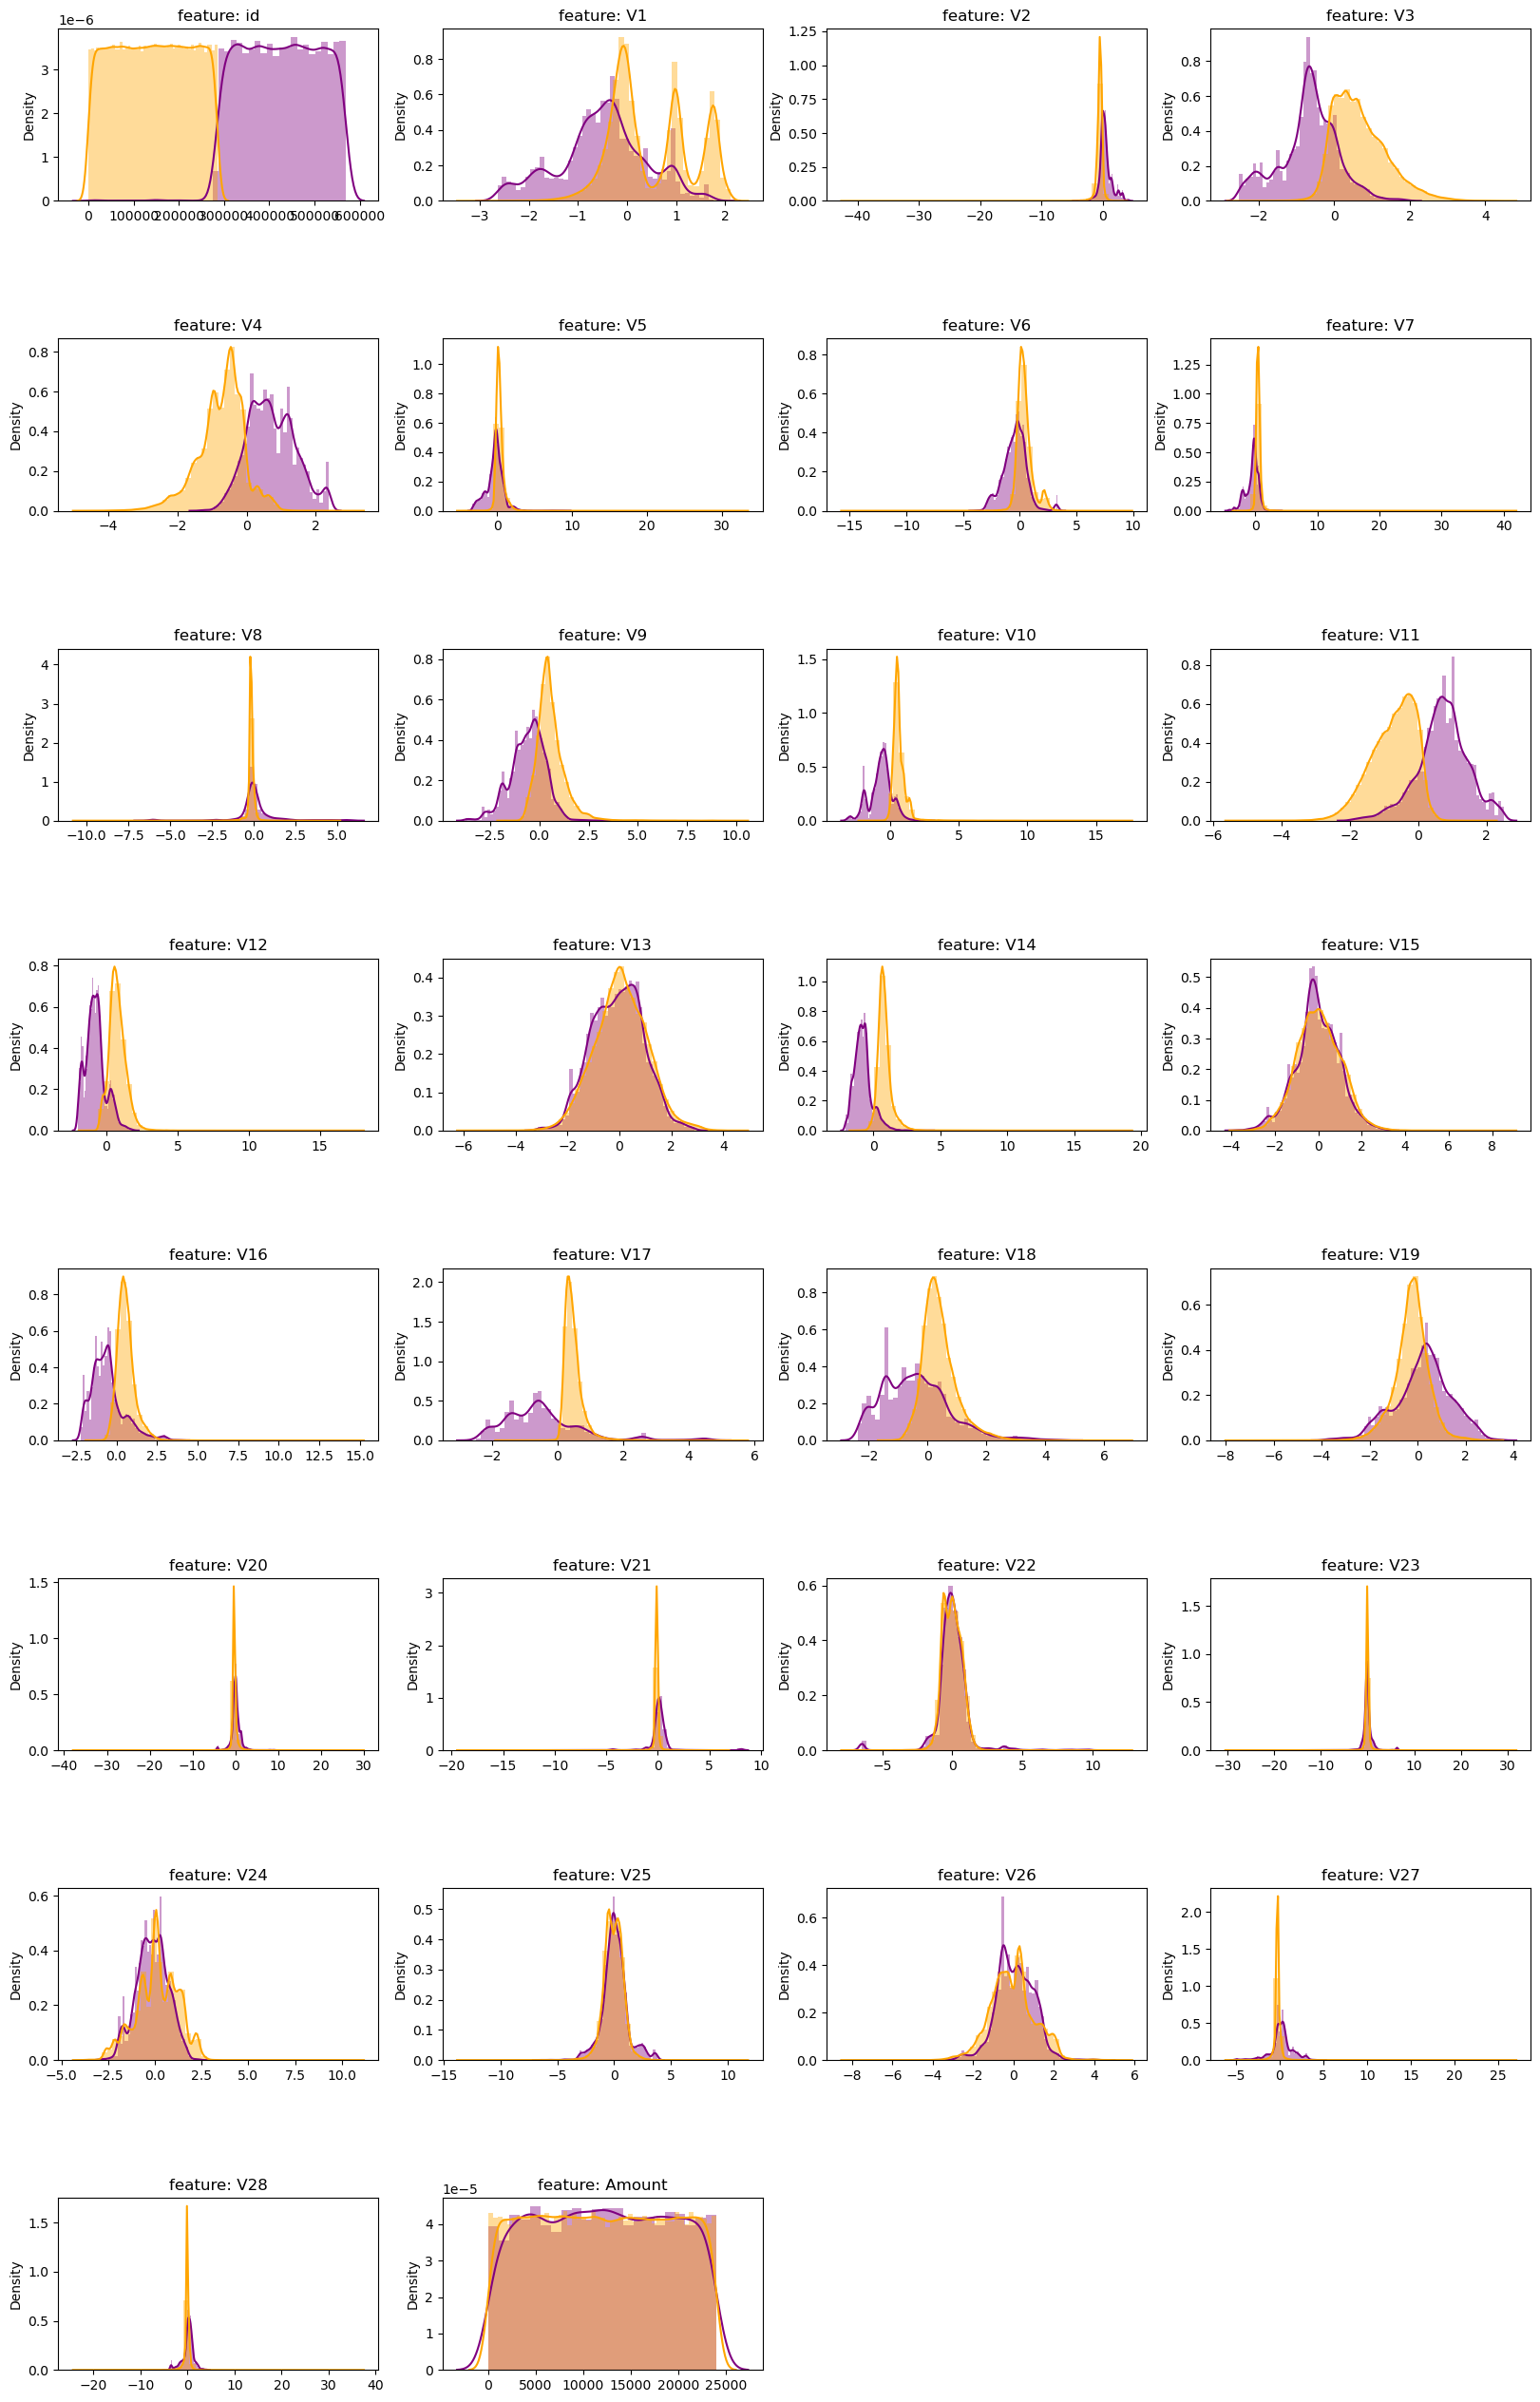

In [10]:
features = df.drop("Class", axis=1)

plt.figure(figsize=(20,32))
gs = gridspec.GridSpec(8, 4)
gs.update(hspace=0.8)

for i, f in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(df[f][df["Class"] == 1], color="purple")
    sns.distplot(df[f][df["Class"] == 0], color="orange", )
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(f))

plt.show()

## 3. Preparación del conjunto de datos

Para respetar la escala de las variables desarrolladas con PCA, no serán tenidas en cuenta "Time" y "Amount". También se puede ver en los gráficos anteriores, que no existe una fuerte discriminación de ambas respecto a la variable objetivo.

In [26]:
# Separación de variables predictoras de la variable dependiente
X = df.drop(["Amount", "Class", "id"], axis=1)
y = df["Class"].copy()

Para el entrenamiento es asignado el 70% de los registros, dejando restante para la instancia de validación.

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024, stratify=y)

En esta división se exige mantener la tasa de transacciones fraudulentas a través del parámetro 'stratify'.

In [28]:
print("Tasa de fraude en el conjunto de entrenamiento:", round(y_train.mean(), 5))
print("Tasa de fraude en el conjunto de prueba:", round(y_test.mean(), 5))

Tasa de fraude en el conjunto de entrenamiento: 0.07345
Tasa de fraude en el conjunto de prueba: 0.07345


## 4. Generación del modelo

### 4.1. Primer modelo con todas las variables predictoras

Para una rápida comprensión del modelo a generar, se entrena la regresión logística con todas las variables del dataset.

In [29]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

### 4.2. Métricas

In [31]:
# validación con datos de entrenamiento
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     79972
           1       0.98      0.88      0.93      6340

    accuracy                           0.99     86312
   macro avg       0.98      0.94      0.96     86312
weighted avg       0.99      0.99      0.99     86312



In [32]:
# validación con datos de validación
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     34275
           1       0.98      0.89      0.93      2717

    accuracy                           0.99     36992
   macro avg       0.98      0.94      0.96     36992
weighted avg       0.99      0.99      0.99     36992



#### Precisión

In [33]:
from sklearn.metrics import precision_score

print("Precisión de train:", precision_score(y_train, y_train_pred))
print("Precisión de test:", precision_score(y_test, y_test_pred))

Precisión de train: 0.9752267969295185
Precisión de test: 0.9784640390085331


#### Recall

In [34]:
from sklearn.metrics import recall_score

print("Recall de train:", recall_score(y_train, y_train_pred))
print("Recall de test:", recall_score(y_test, y_test_pred))

Recall de train: 0.8817034700315457
Recall de test: 0.8862716231137284


#### F1 Score

In [35]:
from sklearn.metrics import f1_score

print("F1 score de train:", f1_score(y_train, y_train_pred))
print("F1 score de test:", f1_score(y_test, y_test_pred))

F1 score de train: 0.9261100066269052
F1 score de test: 0.9300888373889532


#### Matriz de Confusión

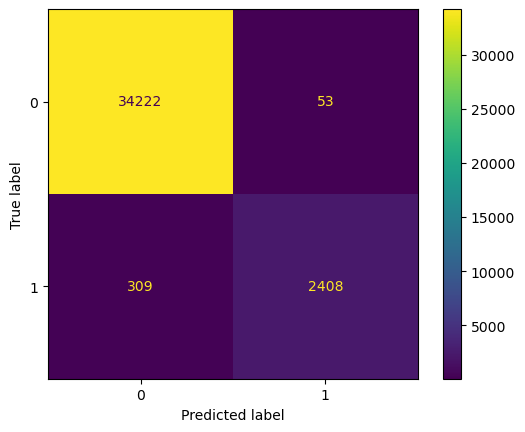

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

In [37]:
y_train_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

#### Curva ROC

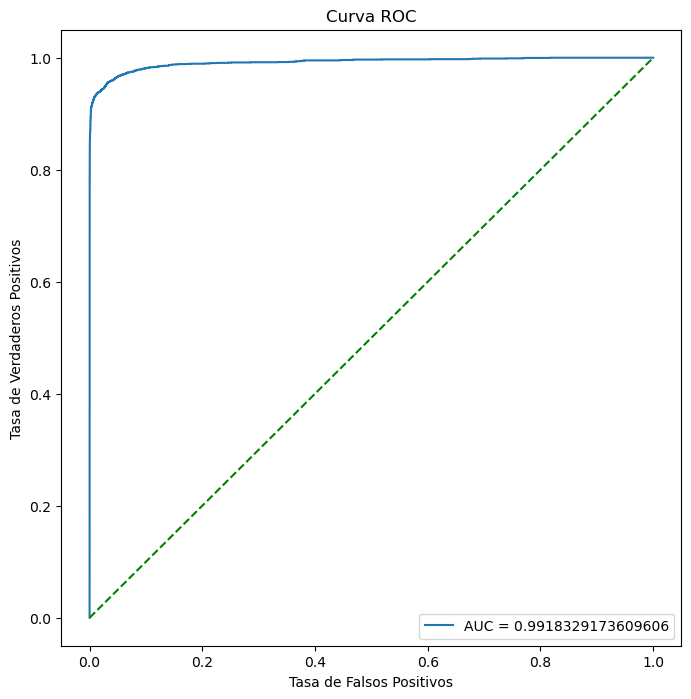

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = clf.predict_proba(X_test)
y_pred = y_probs[:,1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='AUC = ' + str(auc))
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [40]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve

# Supongamos que y_test son las etiquetas reales y y_prob son las probabilidades predichas para la clase positiva
y_prob = clf.predict_proba(X_test)[:,1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Seleccionar 10 puntos equidistantes
threshold_indices = np.round(np.linspace(0, len(thresholds) - 1, 10)).astype(int)

# Crear un DataFrame con los 10 puntos equidistantes de la curva ROC
roc_table = pd.DataFrame({'Threshold': thresholds[threshold_indices], 'FPR': fpr[threshold_indices], 'TPR': tpr[threshold_indices]})
print(roc_table)

      Threshold       FPR       TPR
0           inf  0.000000  0.000000
1  4.910831e-01  0.001721  0.887744
2  1.786259e-01  0.006740  0.924549
3  5.717669e-02  0.026871  0.947368
4  2.773979e-02  0.056513  0.969084
5  1.078818e-02  0.132079  0.985646
6  3.892317e-03  0.289249  0.991903
7  1.326361e-03  0.514223  0.996688
8  5.162069e-04  0.704420  0.998528
9  6.407294e-20  1.000000  1.000000


## 5. Reducción de número de variables predictoras

Para buscar parsimonia en el desarrollo del modelo, serán seleccionadas las variables con mayor relevancia por medio de un Bosque Aleatorio. Se comparará al finalizar la pérdida de predicción generada.

In [43]:
# Separación de variables predictoras de la variable dependiente
X = df.drop(["id", "Amount", "Class"], axis=1)
y = df["Class"].copy()

In [44]:
# Utilizamos Random Forest para realizar selección de características
from sklearn.ensemble import RandomForestClassifier

clf_rnd = RandomForestClassifier(n_estimators=60, random_state=2024, n_jobs=-1)
clf_rnd.fit(X, y)

RandomForestClassifier(n_estimators=60, n_jobs=-1, random_state=2024)

In [45]:
# Seleccionamos las características más importantes
feature_importances = {name: score for name, score in zip(list(X), clf_rnd.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted

V14    0.249180
V17    0.138746
V10    0.113450
V11    0.091610
V12    0.091549
V16    0.075340
V4     0.039620
V3     0.022880
V9     0.021262
V5     0.020954
V7     0.017390
V18    0.016967
V2     0.012914
V1     0.009593
V6     0.008912
V28    0.006887
V21    0.006748
V19    0.006497
V26    0.005972
V8     0.005727
V20    0.005432
V13    0.005356
V15    0.005150
V25    0.004981
V27    0.004837
V22    0.004173
V23    0.003967
V24    0.003909
dtype: float64

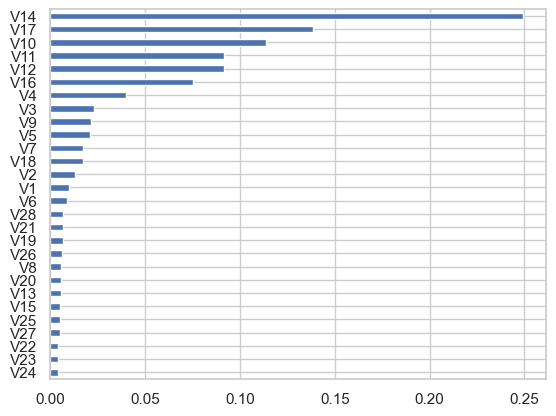

In [46]:
sns.set(style="whitegrid")
feat_importances = pd.Series(feature_importances)
feat_importances.sort_values(ascending=True).plot(kind='barh')
plt.show()

In [47]:
# Reducimos el conjunto de datos a las 8 características más importantes
X_reduced = X[list(feature_importances_sorted.head(8).index)].copy()

In [48]:
X_reduced

,V14,V17,V10,V11,V12,V16,V4,V3
0,0.628,0.404,0.530,0.140,1.564,0.789,-0.430,0.558
1,0.560,0.243,0.575,-0.753,0.737,-0.031,-1.090,1.747
2,0.797,0.442,0.557,-1.735,0.523,0.228,-0.144,0.498
3,0.743,0.292,0.438,-1.107,0.548,0.346,-0.760,0.426
4,0.546,0.780,1.304,-0.475,0.474,0.065,-1.319,0.677
...,...,...,...,...,...,...,...,...
123299,-1.219,0.891,-0.716,1.040,-1.206,0.081,1.187,-0.755
123300,-0.637,2.671,-0.089,-0.185,0.486,0.965,0.139,0.099
123301,-1.344,0.853,-0.300,1.267,-0.718,0.024,1.561,-0.999
123302,-1.608,-1.936,-1.978,1.789,-1.895,-1.986,1.702,-1.630


### 5.1. Entrenamiento con las 8 variables significativas

In [49]:
from sklearn.linear_model import LogisticRegression

X_train_reduced = X_train[list(feature_importances_sorted.head(8).index)].copy()
X_test_reduced = X_test[list(feature_importances_sorted.head(8).index)].copy()

clf = LogisticRegression()
clf.fit(X_train_reduced, y_train)

LogisticRegression()

In [50]:
y_train_pred_reduced = clf.predict(X_train_reduced)
y_test_pred_reduced = clf.predict(X_test_reduced)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred_reduced))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     79972
           1       0.97      0.88      0.92      6340

    accuracy                           0.99     86312
   macro avg       0.98      0.94      0.96     86312
weighted avg       0.99      0.99      0.99     86312



In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred_reduced))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     34275
           1       0.97      0.88      0.92      2717

    accuracy                           0.99     36992
   macro avg       0.98      0.94      0.96     36992
weighted avg       0.99      0.99      0.99     36992



# Conclusiones

Comparando los resultados, no se genera una disminución significativa respecto al poder predictivo del nuevo modelo con 8 variables.

        con todas las variables:
              precision    recall  f1-score   support
                  0.83      0.57      0.68       148


        con las 8 principales:
              precision    recall  f1-score   support
                  0.84      0.52      0.64       148


